This script plot the difference between CTRL and CUX1 KD ATAC seq signal in human CD34+ HSPC for the CUX1-promotor bound loops and non-interacting loops. The loops are identified from CD34 HiC in Zhang 2020

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

Import the count matrix from `computeMatrix`.

In [140]:
# First two: CREs (loop region, not precise enhancer)
CREs = pd.read_csv('CD34_ATAC_CUX1_interacting_loops_Heatmap_values.txt', header=0, sep='\t')
loops_wo_CREs = pd.read_csv('CD34_ATAC_non_CUX1_interacting_loops_Heatmap_values.txt', header=0, sep='\t')
#CREs = pd.read_csv('matrix_CREs.tab', header=0, sep='\t')
#loops_wo_CREs = pd.read_csv('matrix_loops_without_CREs.tab', header=0, sep='\t')
enhancers = pd.read_csv('matrix_enhancers.tab', header=0, sep='\t')
loops_wo_enhancers = pd.read_csv('matrix_loops_without_enhancers.tab', header=0, sep='\t')
CREs

,bamCompare CD34 ATAC KD RPKM,bamCompare CD34 ATAC KD RPKM.1,bamCompare CD34 ATAC KD RPKM.2,bamCompare CD34 ATAC KD RPKM.3,bamCompare CD34 ATAC KD RPKM.4,bamCompare CD34 ATAC KD RPKM.5,bamCompare CD34 ATAC KD RPKM.6,bamCompare CD34 ATAC KD RPKM.7,bamCompare CD34 ATAC KD RPKM.8,bamCompare CD34 ATAC KD RPKM.9,...,bamCompare CD34 ATAC WT RPKM.190,bamCompare CD34 ATAC WT RPKM.191,bamCompare CD34 ATAC WT RPKM.192,bamCompare CD34 ATAC WT RPKM.193,bamCompare CD34 ATAC WT RPKM.194,bamCompare CD34 ATAC WT RPKM.195,bamCompare CD34 ATAC WT RPKM.196,bamCompare CD34 ATAC WT RPKM.197,bamCompare CD34 ATAC WT RPKM.198,bamCompare CD34 ATAC WT RPKM.199
0,0.5904,0.3936,0.1968,0.1855,0.3711,0.4638,0.5566,0.5566,0.6494,0.3711,...,0.4547,0.9093,1.0810,0.9093,0.7380,0.8501,0.5667,0.2834,0.1713,0.3426
1,0.3936,0.5904,0.3936,0.3823,0.3711,0.3711,0.1855,0.0000,0.0000,0.0000,...,1.4230,0.7708,0.7708,0.8565,1.1130,1.2850,1.2850,1.4560,1.6270,2.3920
2,0.1968,0.0000,0.1855,0.3711,0.3711,0.1855,0.0000,0.0000,0.0000,0.0000,...,3.4790,4.0450,5.1520,5.6630,7.2540,12.5400,20.1300,25.7400,27.6300,31.9900
3,0.0000,0.1855,0.7534,1.7150,3.2670,4.9280,6.5790,10.9200,18.0100,24.6100,...,1.0810,1.3380,0.8829,0.4282,0.5139,0.7708,1.0280,0.8565,1.1400,1.4230
4,0.3711,0.5679,0.5792,0.5904,0.3936,0.1968,0.0000,0.1968,0.5904,0.9840,...,0.2834,0.0000,0.0000,0.3426,0.6852,0.8565,0.7972,0.4547,0.2834,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.7647,0.9615,0.8631,0.7647,0.7647,0.5792,0.6776,0.7647,0.9502,0.7534,...,0.3426,0.5139,0.5139,0.7972,1.2520,1.2520,0.9685,0.3426,0.1713,0.4547
268,0.4864,0.2839,0.1855,0.2783,0.5679,0.9502,1.7370,2.3170,3.2560,2.6540,...,2.0820,0.9421,0.3426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
269,1.1360,1.2400,1.1580,1.2790,1.7490,2.5020,2.9720,2.9830,2.5250,2.3500,...,0.3426,0.1713,0.1713,0.5139,0.8565,1.3110,1.9900,2.5570,2.1020,1.8190
270,0.9277,1.1250,1.3210,1.5180,1.3330,1.1580,1.3660,1.5630,1.6390,1.3330,...,1.5940,1.8510,1.7390,1.5420,1.4820,1.1660,0.9093,0.7116,1.2520,1.3640


Aggregate the RPKM values for all the bins (columns) for each region.

In [141]:
CREs_CTRL = CREs.filter(regex = 'CTRL|WT').sum(axis=1)
CREs_KD = CREs.filter(regex = 'KD').sum(axis=1)
CREs_plot = pd.DataFrame({'CTRL': CREs_CTRL,'KD': CREs_KD})

In [142]:
loops_wo_CREs_CTRL = loops_wo_CREs.filter(regex = 'CTRL|WT').sum(axis=1)
loops_wo_CREs_KD = loops_wo_CREs.filter(regex = 'KD').sum(axis=1)
loops_wo_CREs_plot_no_size_match = pd.DataFrame({'CTRL': loops_wo_CREs_CTRL,'KD': loops_wo_CREs_KD})

# Size matching
loops_wo_CREs_plot = loops_wo_CREs_plot_no_size_match.sample(n = CREs_plot.shape[0])

In [143]:
enhancers_CTRL = enhancers.filter(regex = 'CTRL').sum(axis=1)
enhancers_KD = enhancers.filter(regex = 'KD').sum(axis=1)
enhancers_plot = pd.DataFrame({'CTRL': enhancers_CTRL,'KD': enhancers_KD})

In [144]:
loops_wo_enhancers_CTRL = loops_wo_enhancers.filter(regex = 'CTRL').sum(axis=1)
loops_wo_enhancers_KD = loops_wo_enhancers.filter(regex = 'KD').sum(axis=1)
loops_wo_enhancers_plot_no_size_match = pd.DataFrame({'CTRL': loops_wo_enhancers_CTRL,'KD': loops_wo_enhancers_KD})

# Size matching
loops_wo_enhancers_plot = loops_wo_enhancers_plot_no_size_match.sample(n = enhancers_plot.shape[0])

Perform statistical test

In [145]:
scipy.stats.ttest_ind(CREs_plot['CTRL'], CREs_plot['KD'])

Ttest_indResult(statistic=2.276029276439668, pvalue=0.023233530546983894)

In [146]:
scipy.stats.ttest_ind(loops_wo_CREs_plot['CTRL'], loops_wo_CREs_plot['KD'])

Ttest_indResult(statistic=1.1665795977288023, pvalue=0.24389321525639127)

In [147]:
scipy.stats.ttest_ind(enhancers_plot['CTRL'], enhancers_plot['KD'])

Ttest_indResult(statistic=4.410079545669657, pvalue=1.0757658154187705e-05)

In [148]:
scipy.stats.ttest_ind(loops_wo_enhancers_plot['CTRL'], loops_wo_enhancers_plot['KD'])

Ttest_indResult(statistic=1.1445847732168979, pvalue=0.252487622350537)

Plot

In [149]:
CREs_plot['sample']='CREs'
loops_wo_CREs_plot['sample']='loops_wo_CREs'
enhancers_plot['sample']='enhancers'
loops_wo_enhancers_plot['sample']='loops_wo_enhancers'

In [150]:
CREs_plot = pd.melt(CREs_plot,id_vars='sample',var_name="condition",value_name="RPKM")
loops_wo_CREs_plot = pd.melt(loops_wo_CREs_plot,id_vars='sample',var_name="condition",value_name="RPKM")
enhancers_plot = pd.melt(enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")
loops_wo_enhancers_plot = pd.melt(loops_wo_enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")

In [151]:
final_plot=CREs_plot.append(loops_wo_CREs_plot)
final_plot=final_plot.append(enhancers_plot)
final_plot=final_plot.append(loops_wo_enhancers_plot)
final_plot['log2_RPKM'] = np.log2(final_plot['RPKM'])

/Users/alexandregaubil/opt/anaconda3/envs/bioinformatics/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


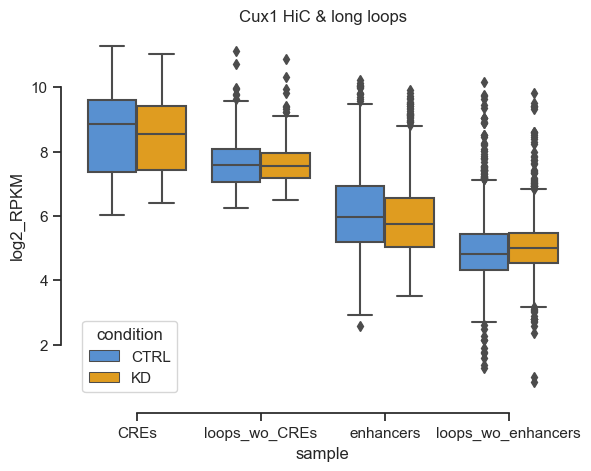

In [152]:
sns.set_theme(style="ticks")
my_pal = {"CTRL":"#448ee4","KD": "orange"}
sns.boxplot(
	x="sample", 
	y="log2_RPKM",
	hue="condition",
	palette=my_pal,
	data=final_plot
).set_title("Cux1 HiC & long loops")
sns.despine(offset=10, trim=True)